### EDA1 with ADS Feature Type

Using OCI ADS Feature Type we can what is the content (and the meaning) of a feature. This way we can use sevearl tools for easier Daat Analysis

using the Employee attrition dataset to show examples

In [1]:
import pandas as pd
import numpy as np
import ads

In [2]:
print(ads.__version__)

2.5.4


In [3]:
# for the example, we will be using the Employe attrtition dataset
URL = "https://objectstorage.us-ashburn-1.oraclecloud.com/n/bigdatadatasciencelarge/b/hosted-ds-datasets/o/synthetic%2Forcl_attrition.csv"

df = pd.read_csv(URL)

df.head()

,Age,Attrition,TravelForWork,SalaryLevel,JobFunction,CommuteLength,EducationalLevel,EducationField,Directs,EmployeeNumber,...,WeeklyWorkedHours,StockOptionLevel,YearsinIndustry,TrainingTimesLastYear,WorkLifeBalance,YearsOnJob,YearsAtCurrentLevel,YearsSinceLastPromotion,YearsWithCurrManager,name
0,42,Yes,infrequent,5054,Product Management,2,L2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Tracy Moore
1,50,No,often,1278,Software Developer,9,L1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Andrew Hoover
2,38,Yes,infrequent,6296,Software Developer,3,L2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Julie Bell
3,34,No,often,6384,Software Developer,4,L4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Thomas Adams
4,28,No,infrequent,2710,Software Developer,3,L1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Johnathan Burnett


In [4]:
# these are the feature types defined by Pandas dtype
df.ads.feature_type

{'Age': ['integer'],
 'Attrition': ['string'],
 'TravelForWork': ['string'],
 'SalaryLevel': ['integer'],
 'JobFunction': ['string'],
 'CommuteLength': ['integer'],
 'EducationalLevel': ['string'],
 'EducationField': ['string'],
 'Directs': ['integer'],
 'EmployeeNumber': ['integer'],
 'EnvironmentSatisfaction': ['integer'],
 'Gender': ['string'],
 'HourlyRate': ['integer'],
 'JobInvolvement': ['integer'],
 'JobLevel': ['integer'],
 'JobRole': ['string'],
 'JobSatisfaction': ['integer'],
 'MaritalStatus': ['string'],
 'MonthlyIncome': ['integer'],
 'MonthlyRate': ['integer'],
 'NumCompaniesWorked': ['integer'],
 'Over18': ['string'],
 'OverTime': ['string'],
 'PercentSalaryHike': ['integer'],
 'PerformanceRating': ['integer'],
 'RelationshipSatisfaction': ['integer'],
 'WeeklyWorkedHours': ['integer'],
 'StockOptionLevel': ['integer'],
 'YearsinIndustry': ['integer'],
 'TrainingTimesLastYear': ['integer'],
 'WorkLifeBalance': ['integer'],
 'YearsOnJob': ['integer'],
 'YearsAtCurrentLev

In [13]:
# The first thing to do is to specify which  featureas are categorical
# we need to build a dictionary
df.ads.feature_type = {'Attrition': ['category'], 'TravelForWork': ['category'], 'Gender': ['category'],
                       'EducationField': ['category'], 'EducationalLevel': ['category'],
                       'JobFunction': ['category'], 'JobRole': ['category'],
                       'OverTime': ['category'], 'MaritalStatus': ['category'],
                       'SalaryLevel': ['continuous'], 'TrainingTimesLastYear': ['continuous']}

### Easily compute and visualize some Stats

In [14]:
# showing the first 20
df.ads.feature_stat().head(20)

,Column,Metric,Value
0,Age,count,1470.000000
1,Age,mean,37.923810
2,Age,standard deviation,9.135373
3,Age,sample minimum,19.000000
4,Age,lower quartile,31.000000
5,Age,median,37.000000
6,Age,upper quartile,44.000000
7,Age,sample maximum,61.000000
8,Attrition,count,1470.000000
9,Attrition,unique,2.000000


In [15]:
# show a row for every feature
df.ads.feature_stat().pivot_table(index='Column', columns='Metric', values = 'Value')

Metric,count,lower quartile,mean,median,sample maximum,sample minimum,skew,standard deviation,unique,upper quartile
Column,,,,,,,,,,
Age,1470.0,31.00,37.923810,37.0,61.0,19.0,NaN,9.135373,NaN,44.00
Attrition,1470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
CommuteLength,1470.0,3.00,10.192517,8.0,30.0,2.0,NaN,8.106864,NaN,15.00
Directs,1470.0,1.00,1.000000,1.0,1.0,1.0,NaN,0.000000,NaN,1.00
EducationField,1470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
EducationalLevel,1470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
EmployeeNumber,1470.0,491.25,1024.865306,1020.5,2068.0,1.0,NaN,602.024335,NaN,1555.75
EnvironmentSatisfaction,1470.0,2.00,2.721769,3.0,4.0,1.0,NaN,1.093082,NaN,4.00
Gender,1470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


### Plots

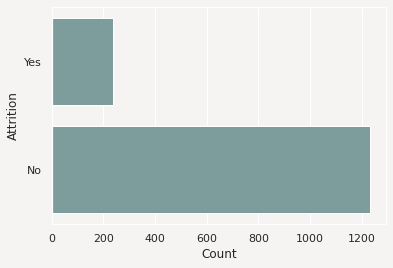

In [16]:
df['Attrition'].ads.feature_plot();

### all in one

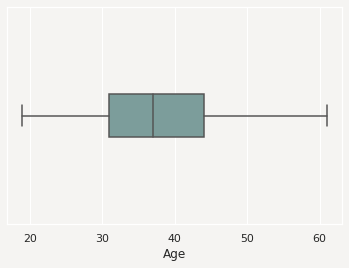

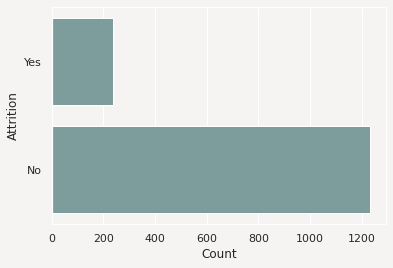

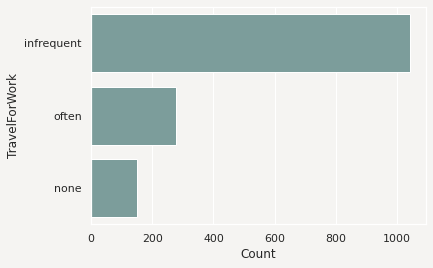

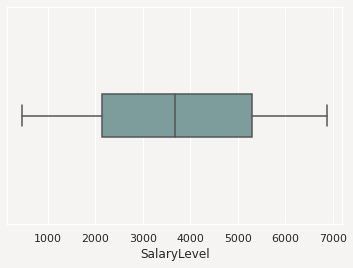

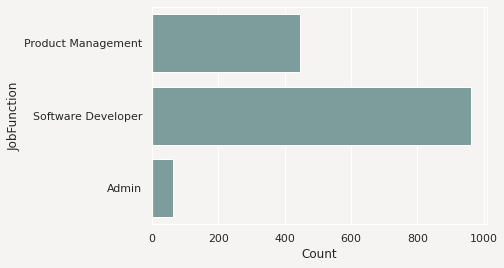

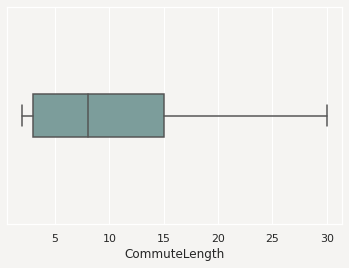

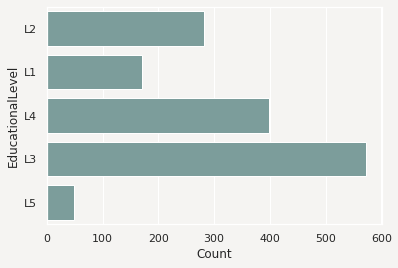

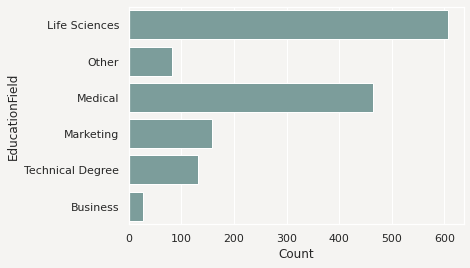

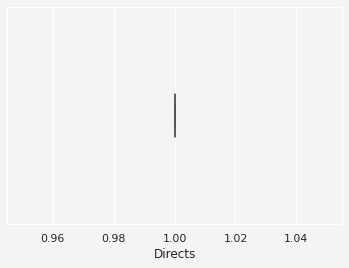

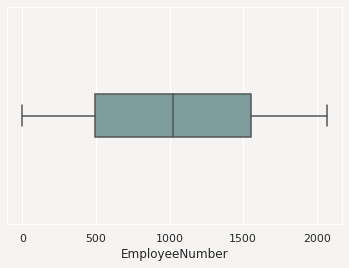

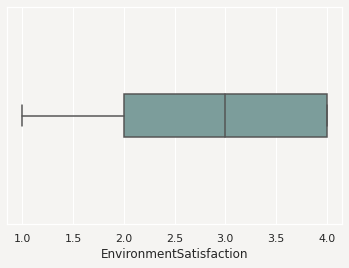

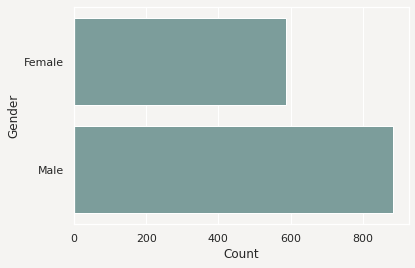

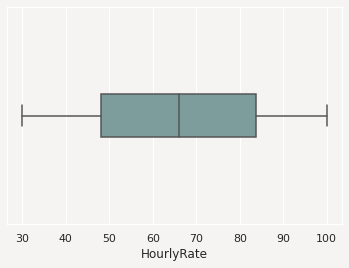

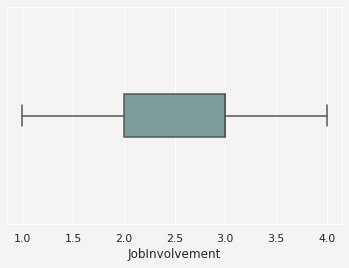

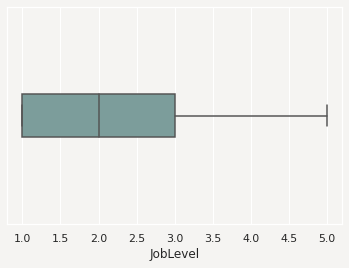

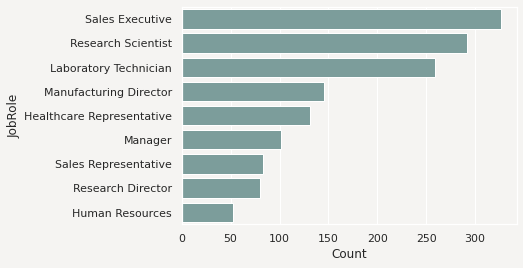

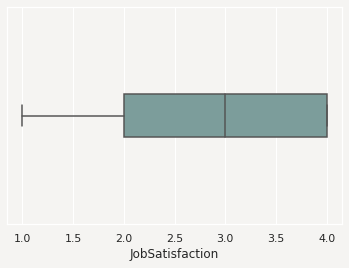

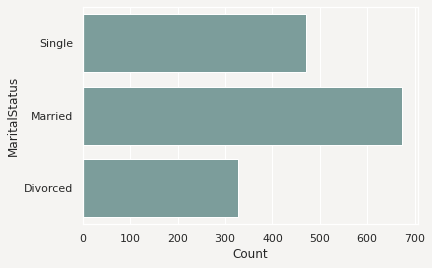

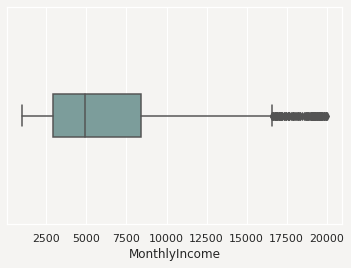

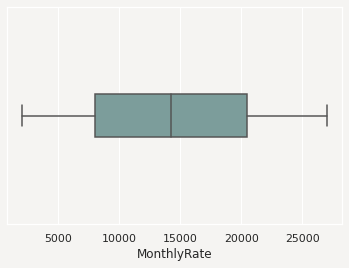

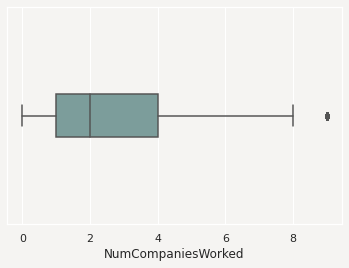

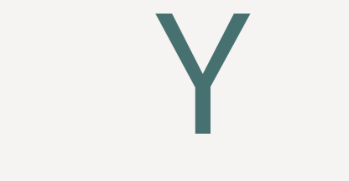

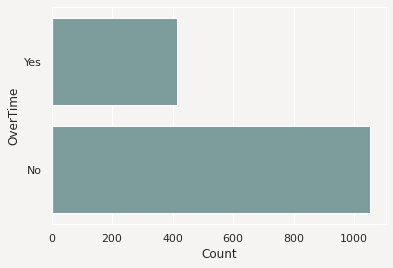

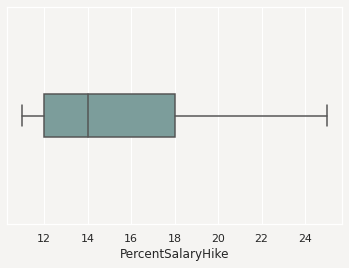

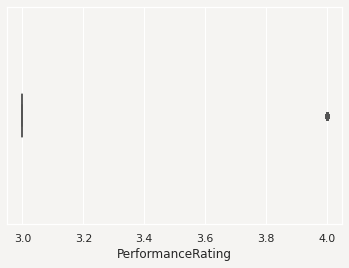

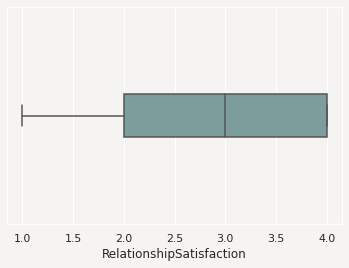

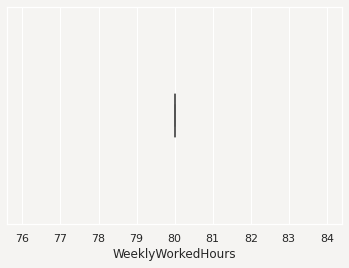

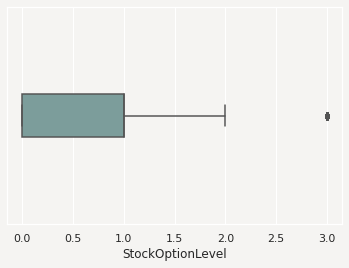

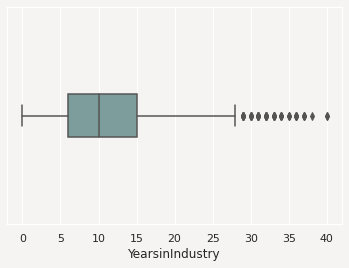

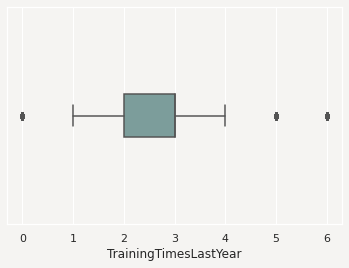

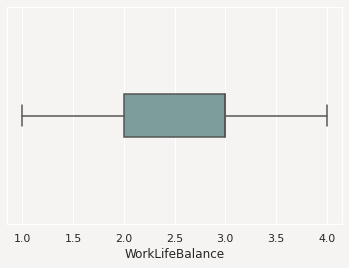

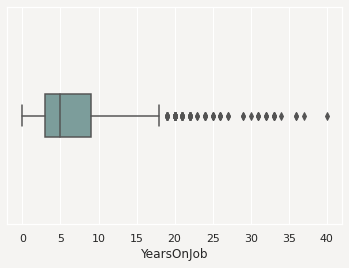

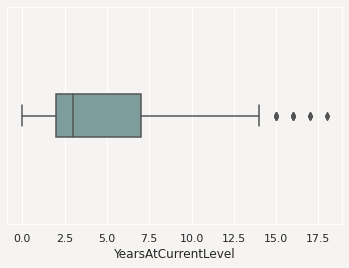

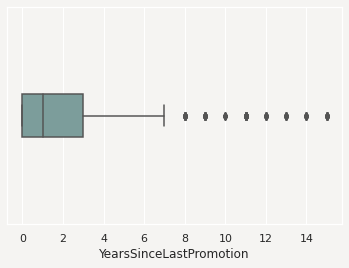

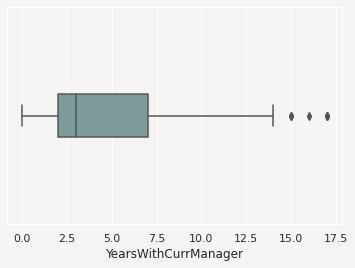

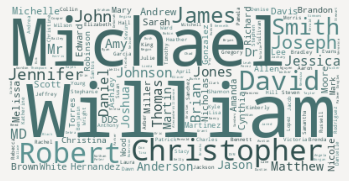

In [17]:
# for all
df.ads.feature_plot();

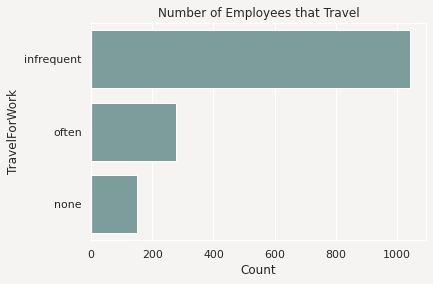

In [19]:
# How to customize a plot
travel_plot = df['TravelForWork'].ads.feature_plot()
# add a title
travel_plot.set_title("Number of Employees that Travel");

### Correlation

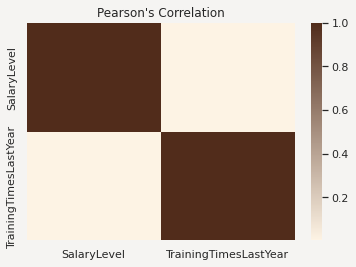

In [20]:
# calcola solo con le feature "continuous"
df.ads.pearson_plot();

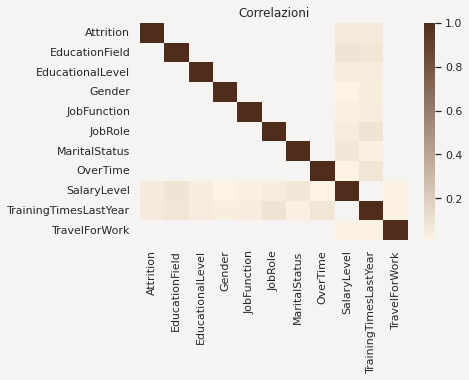

In [21]:
gf = df.ads.correlation_ratio_plot();

gf.set_title('Correlazioni');